In [1]:
from rhessys import snowmelt_experiment as smex
import seaborn as sns
current_palette = sns.color_palette()
import matplotlib.colors as colors

co_color = current_palette[0]
ca_color = current_palette[1]
nm_color = current_palette[2]

co_color = colors.rgb2hex(co_color)
ca_color = colors.rgb2hex(ca_color)
nm_color = colors.rgb2hex(nm_color)

In [2]:
def parse_date(df):
    return '%s-%s-%s'%(int(df.year),int(df.month),int(df.day))

### Note:
Change the function below to accept the snowmelt season start and end dates, and return just the snowmelt season indexed by day of snowmelt

In [3]:
def read_file(fl,strt,nd):
    dat = pd.read_table(fl,sep=' ')
    dat['datetime'] = dat.apply(parse_date,axis=1)
    dat.index = pd.DatetimeIndex(dat.datetime)
    dat = dat[str(strt):str(nd)] # crop the data set
    dat['ET'] = dat.trans + dat.evap
    # add a day of snowmelt season variable
    dat['DOSM'] = np.arange(0,len(dat))
    dat.index = dat.DOSM # make the day of snowmelt the index
    
    return dat

In [4]:
def read_snowmelt(fl):
    dat = pd.read_table(fl, sep=' ',skiprows=1,names=['year','month','day','hour','snowmelt'])
    dat['datetime'] = dat.apply(parse_date,axis=1)
    dat.index = pd.DatetimeIndex(dat.datetime)
    dat.snowmelt *= 1000.
    
    return dat

In [5]:
res = pd.read_hdf('./data/Nr1_smex7_sen_melt.hdf')
res = res.loc[res.combo=='d3:s3']
params = pd.read_pickle('./data/soil_params_multispinup_Nr1_smex7_sen.pcl')
params = params.loc[params.combo=='d3:s3']
cols_to_use = params.columns.difference(res.columns)
co = pd.merge(res,params[cols_to_use],left_index=True,right_index=True,how='outer')

In [6]:
res = pd.read_hdf('./data/P301_smex7_sen_melt.hdf')
res = res.loc[res.combo=='d3:s3']
params = pd.read_pickle('./data/soil_params_multispinup_P301_smex7_sen.pcl')
params = params.loc[params.combo=='d3:s3']
cols_to_use = params.columns.difference(res.columns)
ca = pd.merge(res,params[cols_to_use],left_index=True,right_index=True,how='outer')

In [7]:
res = pd.read_hdf('./data/Vcm_smex7_sen_melt.hdf')
res = res.loc[res.combo=='d3:s3']
params = pd.read_pickle('./data/soil_params_multispinup_Vcm_smex7_sen.pcl')
params = params.loc[params.combo=='d3:s3']
cols_to_use = params.columns.difference(res.columns)
nm = pd.merge(res,params[cols_to_use],left_index=True,right_index=True,how='outer')
nm.dropna(inplace=True)

In [8]:
co['Tnosnow'] = co.TpeakSWE+np.ceil(co.PeakSWE/co.SMR)
ca['Tnosnow'] = ca.TpeakSWE+np.ceil(ca.PeakSWE/ca.SMR)
nm['Tnosnow'] = nm.TpeakSWE+np.ceil(nm.PeakSWE/nm.SMR)

In [9]:
co['date_peakSWE'] = co.apply(smex.DOPEAKSWE2cal,axis=1)
co['date_ONS'] = co.apply(smex.DONS2cal,axis=1)

ca['date_peakSWE'] = ca.apply(smex.DOPEAKSWE2cal,axis=1)
ca['date_ONS'] = ca.apply(smex.DONS2cal,axis=1)

nm['date_peakSWE'] = nm.apply(smex.DOPEAKSWE2cal,axis=1)
nm['date_ONS'] = nm.apply(smex.DONS2cal,axis=1)

/Users/barnhatb/Dropbox/python/bin/rhessys/snowmelt_experiment.py:12: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  td = pd.datetools.timedelta(x.TpeakSWE-1)
/Users/barnhatb/Dropbox/python/bin/rhessys/snowmelt_experiment.py:20: FutureWarning: pandas.core.datetools.timedelta is deprecated. Please use datetime.timedelta instead.
  td = pd.datetools.timedelta(x.Tnosnow-1)


In [10]:
# get the scenario index values
# slow snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR<np.percentile(co.SMR,10))]
co_slowearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.as_matrix()[0]
co_slowlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.as_matrix()[0]

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR<np.percentile(ca.SMR,10))]
ca_slowearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.as_matrix()[0]
ca_slowlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.as_matrix()[0]

tmp = nm.loc[(nm.PeakSWE>np.percentile(nm.PeakSWE,45)) & (nm.PeakSWE<np.percentile(nm.PeakSWE,55)) & (nm.SMR<np.percentile(nm.SMR,10))]
nm_slowearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.as_matrix()[0]
nm_slowlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.as_matrix()[0]

# medium snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR>np.percentile(co.SMR,45)) & (co.SMR<np.percentile(co.SMR,55))]
co_medearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.as_matrix()[0]
co_medlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.as_matrix()[0]

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR>np.percentile(ca.SMR,45)) & (ca.SMR<np.percentile(ca.SMR,55))]
ca_medearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.as_matrix()[0]
ca_medlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.as_matrix()[0]

tmp = nm.loc[(nm.PeakSWE>np.percentile(nm.PeakSWE,45)) & (nm.PeakSWE<np.percentile(nm.PeakSWE,55)) & (nm.SMR>np.percentile(nm.SMR,45)) & (nm.SMR<np.percentile(nm.SMR,55))]
nm_medearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.as_matrix()[0]
nm_medlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.as_matrix()[0]

# fast snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR>np.percentile(co.SMR,90))]
co_fastearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.as_matrix()[0]
co_fastlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.as_matrix()[0]

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR>np.percentile(ca.SMR,90))]
ca_fastearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.as_matrix()[0]
ca_fastlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.as_matrix()[0]

tmp = nm.loc[(nm.PeakSWE>np.percentile(nm.PeakSWE,45)) & (nm.PeakSWE<np.percentile(nm.PeakSWE,55)) & (nm.SMR>np.percentile(nm.SMR,90))]
nm_fastearly = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].scenidx.as_matrix()[0]
nm_fastlate = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].scenidx.as_matrix()[0]

In [11]:
print 'CO'
print co_slowearly
print co_slowlate
print co_medearly
print co_medlate
print co_fastearly
print co_fastlate

print 'CA'
print ca_slowearly
print ca_slowlate
print ca_medearly
print ca_medlate
print ca_fastearly
print ca_fastlate

print 'NM'
print nm_slowearly
print nm_slowlate
print nm_medearly
print nm_medlate
print nm_fastearly
print nm_fastlate

CO
54862
2687
217487
199612
207437
175812
CA
249837
58312
71337
154387
239287
26212
NM
8862.0
8862.0
4012.0
1587.0
7862.0
2212.0


In [12]:
# Convert the index values to file paths
co_slowearly = '/Volumes/data/RHESSys_out/Nwt/smex7_sen/smex7_sen_%s_basin.daily'%int(co_slowearly)
co_slowlate = '/Volumes/data/RHESSys_out/Nwt/smex7_sen/smex7_sen_%s_basin.daily'%int(co_slowlate)
co_medearly = '/Volumes/data/RHESSys_out/Nwt/smex7_sen/smex7_sen_%s_basin.daily'%int(co_medearly)
co_medlate = '/Volumes/data/RHESSys_out/Nwt/smex7_sen/smex7_sen_%s_basin.daily'%int(co_medlate)
co_fastearly = '/Volumes/data/RHESSys_out/Nwt/smex7_sen/smex7_sen_%s_basin.daily'%int(co_fastearly)
co_fastlate = '/Volumes/data/RHESSys_out/Nwt/smex7_sen/smex7_sen_%s_basin.daily'%int(co_fastlate)

ca_slowearly = '/Volumes/data/RHESSys_out/P301/smex7_sen/smex7_sen_%s_basin.daily'%int(ca_slowearly)
ca_slowlate = '/Volumes/data/RHESSys_out/P301/smex7_sen/smex7_sen_%s_basin.daily'%int(ca_slowlate)
ca_medearly = '/Volumes/data/RHESSys_out/P301/smex7_sen/smex7_sen_%s_basin.daily'%int(ca_medearly)
ca_medlate = '/Volumes/data/RHESSys_out/P301/smex7_sen/smex7_sen_%s_basin.daily'%int(ca_medlate)
ca_fastearly = '/Volumes/data/RHESSys_out/P301/smex7_sen/smex7_sen_%s_basin.daily'%int(ca_fastearly)
ca_fastlate = '/Volumes/data/RHESSys_out/P301/smex7_sen/smex7_sen_%s_basin.daily'%int(ca_fastlate)

nm_slowearly = '/Volumes/data/RHESSys_out/Vcm/smex7_sen/smex7_sen_%s_basin.daily'%int(nm_slowearly)
nm_slowlate = '/Volumes/data/RHESSys_out/Vcm/smex7_sen/smex7_sen_%s_basin.daily'%int(nm_slowlate)
nm_medearly = '/Volumes/data/RHESSys_out/Vcm/smex7_sen/smex7_sen_%s_basin.daily'%int(nm_medearly)
nm_medlate = '/Volumes/data/RHESSys_out/Vcm/smex7_sen/smex7_sen_%s_basin.daily'%int(nm_medlate)
nm_fastearly = '/Volumes/data/RHESSys_out/Vcm/smex7_sen/smex7_sen_%s_basin.daily'%int(nm_fastearly)
nm_fastlate = '/Volumes/data/RHESSys_out/Vcm/smex7_sen/smex7_sen_%s_basin.daily'%int(nm_fastlate)

In [13]:
# compute start and stop dates
# slow snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR<np.percentile(co.SMR,10))]
co_slowearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
co_slowearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

co_slowlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
co_slowlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

co_slow_strt = np.max([co_slowearly_strt,co_slowlate_strt])
co_slow_nd = np.min([co_slowearly_nd,co_slowlate_nd])

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR<np.percentile(ca.SMR,10))]
ca_slowearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
ca_slowearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

ca_slowlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
ca_slowlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

ca_slow_strt = np.max([ca_slowearly_strt,ca_slowlate_strt])
ca_slow_nd = np.min([ca_slowearly_nd,ca_slowlate_nd])

tmp = nm.loc[(nm.PeakSWE>np.percentile(nm.PeakSWE,45)) & (nm.PeakSWE<np.percentile(nm.PeakSWE,55)) & (nm.SMR<np.percentile(nm.SMR,10))]
nm_slowearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
nm_slowearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

nm_slowlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
nm_slowlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

nm_slow_strt = np.max([nm_slowearly_strt,nm_slowlate_strt])
nm_slow_nd = np.min([nm_slowearly_nd,nm_slowlate_nd])

# medium snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR>np.percentile(co.SMR,45)) & (co.SMR<np.percentile(co.SMR,55))]
co_medearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
co_medearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

co_medlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
co_medlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

co_med_strt = np.max([co_medearly_strt,co_medlate_strt])
co_med_nd = np.min([co_medearly_nd,co_medlate_nd])

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR>np.percentile(ca.SMR,45)) & (ca.SMR<np.percentile(ca.SMR,55))]
ca_medearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
ca_medearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

ca_medlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
ca_medlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

ca_med_strt = np.max([ca_medearly_strt,ca_medlate_strt])
ca_med_nd = np.min([ca_medearly_nd,ca_medlate_nd])

tmp = nm.loc[(nm.PeakSWE>np.percentile(nm.PeakSWE,45)) & (nm.PeakSWE<np.percentile(nm.PeakSWE,55)) & (nm.SMR>np.percentile(nm.SMR,45)) & (nm.SMR<np.percentile(nm.SMR,55))]
nm_medearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
nm_medearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

nm_medlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
nm_medlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

nm_med_strt = np.max([nm_medearly_strt,nm_medlate_strt])
nm_med_nd = np.min([nm_medearly_nd,nm_medlate_nd])

# fast snowmelt
tmp = co.loc[(co.PeakSWE>np.percentile(co.PeakSWE,45)) & (co.PeakSWE<np.percentile(co.PeakSWE,55)) & (co.SMR>np.percentile(co.SMR,90))]
co_fastearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
co_fastearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

co_fastlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
co_fastlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

co_fast_strt = np.max([co_fastearly_strt,co_fastlate_strt])
co_fast_nd = np.min([co_fastearly_nd,co_fastlate_nd])

tmp = ca.loc[(ca.PeakSWE>np.percentile(ca.PeakSWE,45)) & (ca.PeakSWE<np.percentile(ca.PeakSWE,55)) & (ca.SMR>np.percentile(ca.SMR,90))]
ca_fastearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
ca_fastearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

ca_fastlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
ca_fastlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

ca_fast_strt = np.max([ca_fastearly_strt,ca_fastlate_strt])
ca_fast_nd = np.min([ca_fastearly_nd,ca_fastlate_nd])

tmp = nm.loc[(nm.PeakSWE>np.percentile(nm.PeakSWE,45)) & (nm.PeakSWE<np.percentile(nm.PeakSWE,55)) & (nm.SMR>np.percentile(nm.SMR,90))]
nm_fastearly_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_peakSWE.as_matrix()[0]
nm_fastearly_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.min()].date_ONS.as_matrix()[0]

nm_fastlate_strt = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_peakSWE.as_matrix()[0]
nm_fastlate_nd = tmp.loc[tmp.TpeakSWE == tmp.TpeakSWE.max()].date_ONS.as_matrix()[0]

nm_fast_strt = np.max([nm_fastearly_strt,nm_fastlate_strt])
nm_fast_nd = np.min([nm_fastearly_nd,nm_fastlate_nd])

In [14]:
# load the files, subset them, merge to one data frame per snowmelt rate class
co_slowearly = read_file(co_slowearly,co_slowearly_strt,co_slowearly_nd)[['ET','streamflow']]
co_slowlate = read_file(co_slowlate,co_slowlate_strt,co_slowlate_nd)[['ET','streamflow']]

co_slow = pd.merge(left=co_slowearly,right=co_slowlate,how='inner',left_index=True,right_index=True)
co_slow['diff'] = co_slow.ET_y - co_slow.ET_x # late - early snowmelt

co_medearly = read_file(co_medearly,co_medearly_strt,co_medearly_nd)[['ET','streamflow']]
co_medlate = read_file(co_medlate,co_medlate_strt,co_medlate_nd)[['ET','streamflow']]

co_med = pd.merge(left=co_medearly,right=co_medlate,how='inner',left_index=True,right_index=True)
co_med['diff'] = co_med.ET_y - co_med.ET_x # late - early snowmelt

co_fastearly = read_file(co_fastearly,co_fastearly_strt,co_fastearly_nd)[['ET','streamflow']]
co_fastlate = read_file(co_fastlate,co_fastlate_strt,co_fastlate_nd)[['ET','streamflow']]

co_fast = pd.merge(left=co_fastearly,right=co_fastlate,how='inner',left_index=True,right_index=True)
co_fast['diff'] = co_fast.ET_y - co_fast.ET_x # late - early snowmelt

# load the files, subset them, merge to one data frame per snowmelt rate class
ca_slowearly = read_file(ca_slowearly,ca_slowearly_strt,ca_slowearly_nd)[['ET','streamflow']]
ca_slowlate = read_file(ca_slowlate,ca_slowlate_strt,ca_slowlate_nd)[['ET','streamflow']]

ca_slow = pd.merge(left=ca_slowearly,right=ca_slowlate,how='inner',left_index=True,right_index=True)
ca_slow['diff'] = ca_slow.ET_y - ca_slow.ET_x # late - early snowmelt

ca_medearly = read_file(ca_medearly,ca_medearly_strt,ca_medearly_nd)[['ET','streamflow']]
ca_medlate = read_file(ca_medlate,ca_medlate_strt,ca_medlate_nd)[['ET','streamflow']]

ca_med = pd.merge(left=ca_medearly,right=ca_medlate,how='inner',left_index=True,right_index=True)
ca_med['diff'] = ca_med.ET_y - ca_med.ET_x # late - early snowmelt

ca_fastearly = read_file(ca_fastearly,ca_fastearly_strt,ca_fastearly_nd)[['ET','streamflow']]
ca_fastlate = read_file(ca_fastlate,ca_fastlate_strt,ca_fastlate_nd)[['ET','streamflow']]

ca_fast = pd.merge(left=ca_fastearly,right=ca_fastlate,how='inner',left_index=True,right_index=True)
ca_fast['diff'] = ca_fast.ET_y - ca_fast.ET_x # late - early snowmelt

# load the files, subset them, merge to one data frame per snowmelt rate class
nm_slowearly = read_file(nm_slowearly,nm_slowearly_strt,nm_slowearly_nd)[['ET','streamflow']]
nm_slowlate = read_file(nm_slowlate,nm_slowlate_strt,nm_slowlate_nd)[['ET','streamflow']]

nm_slow = pd.merge(left=nm_slowearly,right=nm_slowlate,how='inner',left_index=True,right_index=True)
nm_slow['diff'] = nm_slow.ET_y - nm_slow.ET_x # late - early snowmelt

nm_medearly = read_file(nm_medearly,nm_medearly_strt,nm_medearly_nd)[['ET','streamflow']]
nm_medlate = read_file(nm_medlate,nm_medlate_strt,nm_medlate_nd)[['ET','streamflow']]

nm_med = pd.merge(left=nm_medearly,right=nm_medlate,how='inner',left_index=True,right_index=True)
nm_med['diff'] = nm_med.ET_y - nm_med.ET_x # late - early snowmelt

nm_fastearly = read_file(nm_fastearly,nm_fastearly_strt,nm_fastearly_nd)[['ET','streamflow']]
nm_fastlate = read_file(nm_fastlate,nm_fastlate_strt,nm_fastlate_nd)[['ET','streamflow']]

nm_fast = pd.merge(left=nm_fastearly,right=nm_fastlate,how='inner',left_index=True,right_index=True)
nm_fast['diff'] = nm_fast.ET_y - nm_fast.ET_x # late - early snowmelt

In [20]:
slow = [co_slow,ca_slow,nm_slow]
med = [co_med,ca_med,nm_med]
fast = [co_fast,ca_fast,nm_fast]

speeds = [slow,med,fast]
titles = ['a: Slow Snowmelt Rate', 'b: Medium Snowmelt Rate','c: Fast Snowmelt Rate']
sites = ['CO','CA','NM']
lw = 2

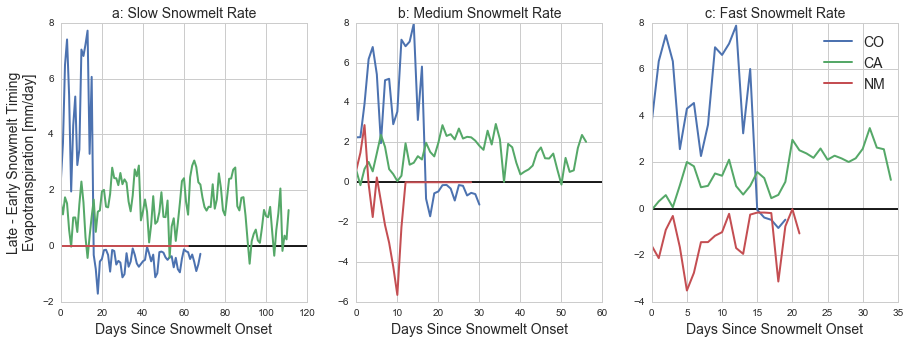

In [21]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

axes = [ax1,ax2,ax3]

for ax,speed,title in zip(axes,speeds,titles):
    ax.set_title(title,fontsize=14)
    ax.axhline(0,color='k')
    for df,site in zip(speed,sites):
        ax.plot(df.index,df['diff'],label = site,lw=lw)
        ax.set_xlabel('Days Since Snowmelt Onset', fontsize=14)

ax1.set_ylabel('Late - Early Snowmelt Timing\nEvapotranspiration [mm/day]', fontsize=14)
plt.legend(fontsize=14)

#plt.savefig('./figures/ETdifference_timeseries.png',dpi=300,bbox_inches='tight')
#plt.savefig('./figures/ETdifference_timeseries.pdf',bbox_inches='tight')

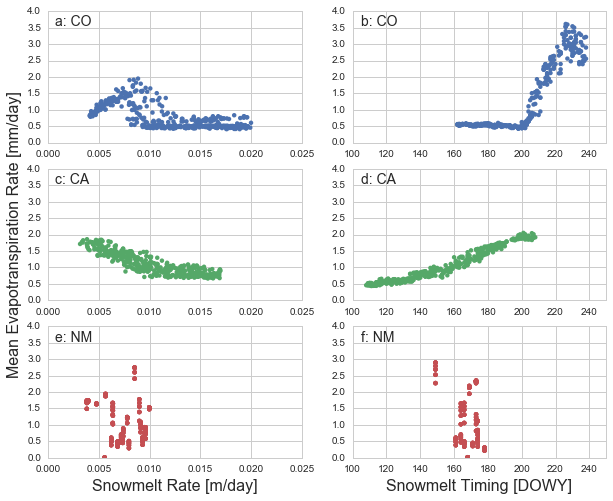

In [22]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

axes = [ax1,ax2,ax3,ax4,ax5,ax6]
smraxes = [ax1,ax3,ax5]
smtaxes = [ax2,ax4,ax6]

df = co
minval = 40
maxval = 60
peakswemax = np.percentile(df.PeakSWE,maxval)
peakswemin = np.percentile(df.PeakSWE,minval)
timingmax = np.percentile(df.TpeakSWE,maxval)
timingmin = np.percentile(df.TpeakSWE,minval)
smrmax = np.percentile(df.SMR,maxval)
smrmin = np.percentile(df.SMR,minval)
smr = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.TpeakSWE<=timingmax)&(df.TpeakSWE>=timingmin)]
smt = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.SMR<=smrmax)&(df.SMR>=smrmin)]

ax1.scatter(smr.SMR,smr.ETRate,s=20,c=co_color,edgecolors='None')
ax2.scatter(smt.TpeakSWE,smt.ETRate,s=20,c=co_color,edgecolors='None')

df = ca
minval = 40
maxval = 60
peakswemax = np.percentile(df.PeakSWE,maxval)
peakswemin = np.percentile(df.PeakSWE,minval)
timingmax = np.percentile(df.TpeakSWE,maxval)
timingmin = np.percentile(df.TpeakSWE,minval)
smrmax = np.percentile(df.SMR,maxval)
smrmin = np.percentile(df.SMR,minval)
smr = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.TpeakSWE<=timingmax)&(df.TpeakSWE>=timingmin)]
smt = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.SMR<=smrmax)&(df.SMR>=smrmin)]

ax3.scatter(smr.SMR,smr.ETRate,s=20,c=ca_color,edgecolors='None')
ax4.scatter(smt.TpeakSWE,smt.ETRate,s=20,c=ca_color,edgecolors='None')

df = nm
minval = 40
maxval = 60
peakswemax = np.nanpercentile(df.PeakSWE,maxval)
peakswemin = np.nanpercentile(df.PeakSWE,minval)
timingmax = np.nanpercentile(df.TpeakSWE,maxval)
timingmin = np.nanpercentile(df.TpeakSWE,minval)
smrmax = np.nanpercentile(df.SMR,maxval)
smrmin = np.nanpercentile(df.SMR,minval)
smr = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.TpeakSWE<=timingmax)&(df.TpeakSWE>=timingmin)]
smt = df.loc[(df.PeakSWE<=peakswemax)&(df.PeakSWE>=peakswemin)&(df.SMR<=smrmax)&(df.SMR>=smrmin)]

ax5.scatter(smr.SMR,smr.ETRate,s=20,c=nm_color,edgecolors='None')
ax6.scatter(smt.TpeakSWE,smt.ETRate,s=20,c=nm_color,edgecolors='None')

[ax.set_ylim(0,4) for ax in axes]
[ax.set_xlim(0,0.025) for ax in smraxes]
[ax.set_xlim(100,250) for ax in smtaxes]
ax5.set_xlabel('Snowmelt Rate [m/day]',fontsize=16)
ax6.set_xlabel('Snowmelt Timing [DOWY]',fontsize=16)
ax3.set_ylabel('Mean Evapotranspiration Rate [mm/day]', fontsize=16)
ax1.text(0.0007,3.55,'a: CO',fontsize=14)
ax3.text(0.0007,3.55,'c: CA',fontsize=14)
ax5.text(0.0007,3.55,'e: NM',fontsize=14)

ax2.text(105,3.55,'b: CO',fontsize=14)
ax4.text(105,3.55,'d: CA',fontsize=14)
ax6.text(105,3.55,'f: NM',fontsize=14)

plt.savefig('./figures/meanETrate_SMR_SMT.png',dpi=300,bbox_inches='tight')
plt.savefig('./figures/meanETrate_SMR_SMT.pdf',bbox_inches='tight')